Dependencies

In [11]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\korey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\korey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Alice in Wonderland - Text Analysis

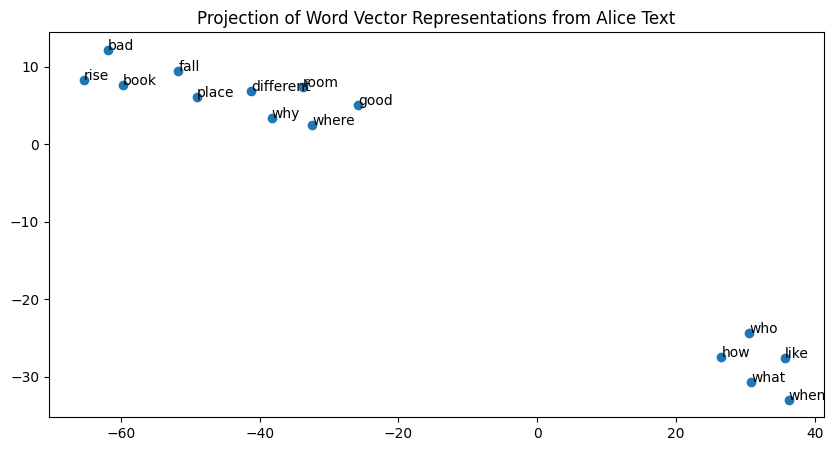

In [12]:
text = './text/alice.txt'

with open(text, 'r', encoding='UTF-8') as file:
    sentences = file.readlines()
tokenized_sent = [nltk.word_tokenize(sentence) for sentence in sentences]

alice_word_model = Word2Vec(tokenized_sent, vector_size=200, window=5, min_count=1, workers=5)

selected_words = ['good', 'bad', 'different', 'like', 'fall', 'rise', 'room', 'place', 'book', 'where', 'who', 'what', 'why', 'when', 'how']
selected_words_ = [word for word in selected_words if word in alice_word_model.wv]

alice_word_vectors = alice_word_model.wv[selected_words_]

tsne = TSNE(n_components=2, perplexity=4, random_state=0) 
embedded_vec = tsne.fit_transform(alice_word_vectors)

plt.figure(figsize=(10, 5))
plt.scatter(embedded_vec[:, 0], embedded_vec[:, 1])

for i, word in enumerate(selected_words_):
    plt.annotate(word, (embedded_vec[i, 0], embedded_vec[i, 1]))

plt.title('Projection of Word Vector Representations from Alice Text')
plt.show()

In [13]:
alice_cosine_similarities = {}

In [14]:
alice_cosine_similarities["good-like"] = alice_word_model.wv.similarity('good','like')
alice_cosine_similarities["good-like"]

0.9995594

In [15]:
alice_cosine_similarities["good-bad"] = alice_word_model.wv.similarity('good','bad')
alice_cosine_similarities["good-bad"]



0.968169

In [16]:
alice_word_model.wv.most_similar(positive=['good', 'like'])

[('or', 0.9998689889907837),
 ('of', 0.9998594522476196),
 ('.', 0.9998542070388794),
 ('for', 0.9998520016670227),
 ('that', 0.9998518824577332),
 ('is', 0.9998512268066406),
 ('very', 0.9998504519462585),
 ('to', 0.9998504519462585),
 ('with', 0.9998503923416138),
 ('in', 0.9998485445976257)]

Custom Writing - Text Analysis

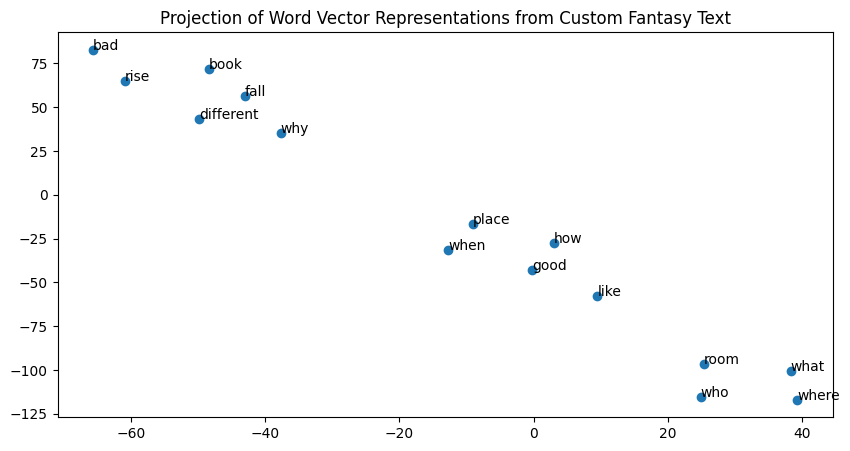

In [17]:
text = './text/custom.txt'

with open(text, 'r', encoding='UTF-8') as file:
    sentences = file.readlines()
tokenized_sent = [nltk.word_tokenize(sentence) for sentence in sentences]

custom_word_model = Word2Vec(tokenized_sent, vector_size=200, window=5, min_count=1, workers=5)

selected_words = ['good', 'bad', 'different', 'like', 'fall', 'rise', 'room', 'place', 'book', 'where', 'who', 'what', 'why', 'when', 'how']
selected_words_ = [word for word in selected_words if word in custom_word_model.wv]

custom_word_vectors = custom_word_model.wv[selected_words_]

tsne = TSNE(n_components=2, perplexity=4, random_state=0) 
embedded_vec = tsne.fit_transform(custom_word_vectors)

plt.figure(figsize=(10, 5))
plt.scatter(embedded_vec[:, 0], embedded_vec[:, 1])

for i, word in enumerate(selected_words_):
    plt.annotate(word, (embedded_vec[i, 0], embedded_vec[i, 1]))

plt.title('Projection of Word Vector Representations from Custom Fantasy Text')
plt.show()

In [18]:
custom_cosine_similarities = {}

In [19]:
custom_cosine_similarities["good-like"] = custom_word_model.wv.similarity('good','like')
custom_cosine_similarities["good-like"]

0.99956

In [20]:
custom_cosine_similarities["good-bad"] = custom_word_model.wv.similarity('good','bad')
custom_cosine_similarities["good-bad"]

0.7082858

In [21]:
custom_word_model.wv.most_similar(positive=['good', 'like'])

[('it', 0.9998778104782104),
 ('not', 0.999871015548706),
 ('have', 0.9998648166656494),
 ('that', 0.9998572468757629),
 ('this', 0.9998535513877869),
 ('our', 0.9998518824577332),
 ('is', 0.9998509287834167),
 ('all', 0.9998495578765869),
 ("'ve", 0.9998452663421631),
 ('be', 0.999845027923584)]

Merged - Text Analysis

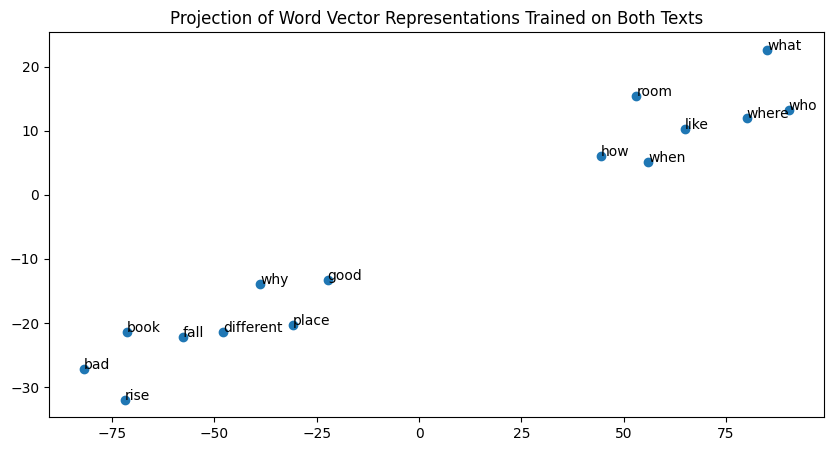

In [22]:
text = './text/alice.txt'
second_text = './text/custom.txt'

with open(text, 'r', encoding='UTF-8') as file:
    sentences = file.readlines()
tokenized_sent = [nltk.word_tokenize(sentence) for sentence in sentences]

with open(second_text, 'r', encoding='UTF-8') as file:
    sentences_cont = file.readlines()
tokenized_sent_cont = [nltk.word_tokenize(sentence) for sentence in sentences_cont]

merged_word_model = Word2Vec(tokenized_sent + tokenized_sent_cont, vector_size=200, window=5, min_count=1, workers=5)

selected_words = ['good', 'bad', 'different', 'like', 'fall', 'rise', 'room', 'place', 'book', 'where', 'who', 'what', 'why', 'when', 'how']
selected_words_ = [word for word in selected_words if word in merged_word_model.wv]

merged_word_vectors = merged_word_model.wv[selected_words_]

tsne = TSNE(n_components=2, perplexity=4, random_state=0) 
embedded_vec = tsne.fit_transform(merged_word_vectors)

plt.figure(figsize=(10, 5))
plt.scatter(embedded_vec[:, 0], embedded_vec[:, 1])

for i, word in enumerate(selected_words_):
    plt.annotate(word, (embedded_vec[i, 0], embedded_vec[i, 1]))

plt.title('Projection of Word Vector Representations Trained on Both Texts')
plt.show()

In [23]:
merged_cosine_similarities = {}

In [24]:
merged_cosine_similarities["good-like"] = merged_word_model.wv.similarity('good','like')
merged_cosine_similarities["good-like"]

0.9991834

In [25]:
merged_cosine_similarities["good-bad"] = merged_word_model.wv.similarity('good','bad')
merged_cosine_similarities["good-bad"]

0.9322974

In [26]:
merged_word_model.wv.most_similar(positive=['good', 'like'])

[('is', 0.9998644590377808),
 ('will', 0.9998436570167542),
 ('not', 0.999829113483429),
 ('so', 0.9998193979263306),
 ('here', 0.9998134970664978),
 ('me', 0.9998036026954651),
 ('be', 0.9998012185096741),
 ('should', 0.9997993111610413),
 ('would', 0.9997948408126831),
 ('must', 0.9997878074645996)]

Differences of Cosine Similarities

In [27]:
similarity_pairs = ["good-like", "good-bad"]

for i in range(len(similarity_pairs)):
    print("Difference in Cosine Similarities for Merged {} & Alice {} Word Vector Representations: {}".format(similarity_pairs[i], similarity_pairs[i], merged_cosine_similarities[similarity_pairs[i]] - alice_cosine_similarities[similarity_pairs[i]]))
    print("Difference in Cosine Similarities for Merged {} & Custom Fantasy {} Word Vector Representations: {}".format(similarity_pairs[i], similarity_pairs[i], merged_cosine_similarities[similarity_pairs[i]] - custom_cosine_similarities[similarity_pairs[i]]))

Difference in Cosine Similarities for Merged good-like & Alice good-like Word Vector Representations: -0.00037598609924316406
Difference in Cosine Similarities for Merged good-like & Custom Fantasy good-like Word Vector Representations: -0.00037658214569091797
Difference in Cosine Similarities for Merged good-bad & Alice good-bad Word Vector Representations: -0.03587156534194946
Difference in Cosine Similarities for Merged good-bad & Custom Fantasy good-bad Word Vector Representations: 0.2240116000175476
